In [1]:
import pandas as pd

experiment_files = {
    "standard alpha=1.0": "results/log_0_ResNet18_standard_1.0.csv",
    "weighted alpha=1.0 gamma=0.5": "results/log_0_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25": "results/log_0_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125": "results/log_0_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1": "results/log_0_ResNet18_weighted_1.csv",
    "weighted alpha=1.0 gamma=2": "results/log_0_ResNet18_weighted_2.csv",
    "weighted alpha=1.0 gamma=4": "results/log_0_ResNet18_weighted_4.csv",
    "weighted alpha=1.0 gamma=8": "results/log_0_ResNet18_weighted_8.csv",
    "standard alpha=0.1": "results/log_alpha01_ResNet18_standard_1.0.csv",
    "standard alpha=0.2": "results/log_alpha02_ResNet18_standard_1.0.csv",
    "erm decay=1e-2": "results/log_decay1e-2_ResNet18_erm_1.0.csv",
    "erm decay=1e-3": "results/log_decay1e-3_ResNet18_erm_1.0.csv",
    "erm decay=1e-4": "results/log_decay1e-4_ResNet18_erm_1.0.csv",
    "weighted alpha=1.0 gamma=0.5 mu=0": "results/log_mu0_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25 mu=0": "results/log_mu0_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125 mu=0": "results/log_mu0_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1 mu=0": "results/log_mu0_ResNet18_weighted_1.csv",
    "weighted alpha=0.1 gamma=1 mu=0.5": "results/log_mu05_alpha01_ResNet18_weighted_1.csv",
    "weighted alpha=0.2 gamma=1 mu=0.5": "results/log_mu05_alpha02_ResNet18_weighted_1.csv",
    "weighted alpha=1.0 gamma=0.5 mu=0.5": "results/log_mu05_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25 mu=0.5": "results/log_mu05_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125 mu=0.5": "results/log_mu05_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1 mu=0.5": "results/log_mu05_ResNet18_weighted_1.csv",
}

df = pd.concat(
    [
        pd.read_csv(file).assign(experiment=experiment)
        for experiment, file in experiment_files.items()
    ]
)

df["train acc"] = df["train acc"] / 100
df["test acc"] = df["test acc"] / 100

In [2]:
print("Best test accuracy at any epoch for each experiment:")
print(df.groupby("experiment")["test acc"].max().sort_values(ascending=False))

Best test accuracy at any epoch for each experiment:
experiment
weighted alpha=1.0 gamma=0.25 mu=0.5     0.9471
weighted alpha=1.0 gamma=0.25 mu=0       0.9457
weighted alpha=1.0 gamma=0.125 mu=0      0.9446
weighted alpha=1.0 gamma=0.125           0.9441
weighted alpha=1.0 gamma=0.5 mu=0        0.9441
weighted alpha=1.0 gamma=1 mu=0          0.9440
weighted alpha=1.0 gamma=0.125 mu=0.5    0.9436
weighted alpha=1.0 gamma=1 mu=0.5        0.9432
weighted alpha=1.0 gamma=1               0.9429
weighted alpha=1.0 gamma=0.5             0.9428
standard alpha=1.0                       0.9417
weighted alpha=1.0 gamma=0.5 mu=0.5      0.9417
weighted alpha=1.0 gamma=0.25            0.9411
standard alpha=0.2                       0.9410
weighted alpha=1.0 gamma=2               0.9397
weighted alpha=0.1 gamma=1 mu=0.5        0.9391
weighted alpha=0.2 gamma=1 mu=0.5        0.9389
standard alpha=0.1                       0.9374
weighted alpha=1.0 gamma=4               0.9327
weighted alpha=1.0 gamma

In [3]:
print("Best median test accuracy in last 10 epochs for each experiment:")
last_10 = df.groupby("experiment")["test acc"].apply(lambda x: x.tail(10))
medians = last_10.groupby("experiment").median()
medians.sort_values(ascending=False)

Best median test accuracy in last 10 epochs for each experiment:


experiment
weighted alpha=1.0 gamma=0.25 mu=0.5     0.94065
standard alpha=0.2                       0.93960
weighted alpha=1.0 gamma=1               0.93920
weighted alpha=1.0 gamma=1 mu=0.5        0.93850
weighted alpha=1.0 gamma=0.125 mu=0.5    0.93830
weighted alpha=0.2 gamma=1 mu=0.5        0.93795
weighted alpha=0.1 gamma=1 mu=0.5        0.93755
standard alpha=0.1                       0.93635
standard alpha=1.0                       0.93470
weighted alpha=1.0 gamma=0.5 mu=0        0.93450
weighted alpha=1.0 gamma=0.5             0.93425
weighted alpha=1.0 gamma=0.5 mu=0.5      0.93420
weighted alpha=1.0 gamma=0.125           0.93370
weighted alpha=1.0 gamma=2               0.93295
weighted alpha=1.0 gamma=0.25 mu=0       0.93105
weighted alpha=1.0 gamma=1 mu=0          0.92975
weighted alpha=1.0 gamma=0.125 mu=0      0.92920
weighted alpha=1.0 gamma=0.25            0.92485
weighted alpha=1.0 gamma=4               0.92325
weighted alpha=1.0 gamma=8               0.89540
erm decay

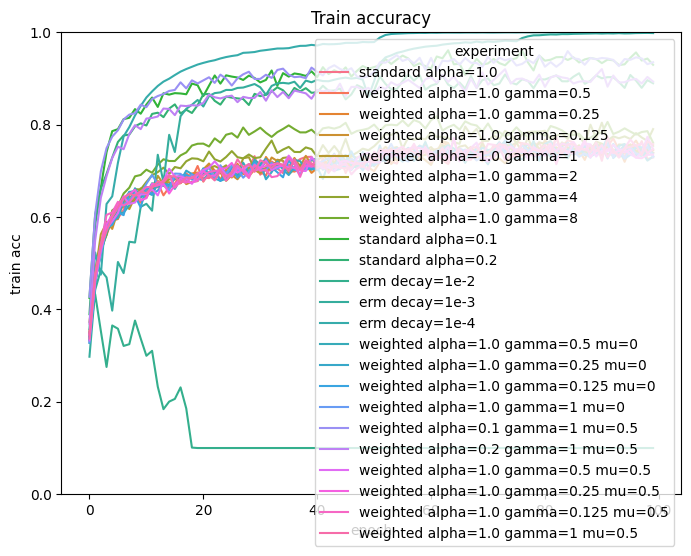

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Train accuracy")
plt.show()

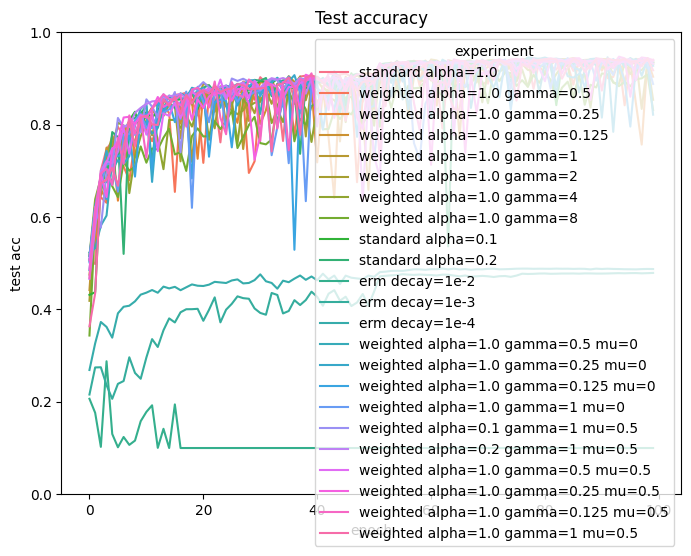

In [5]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Test accuracy")
plt.show()

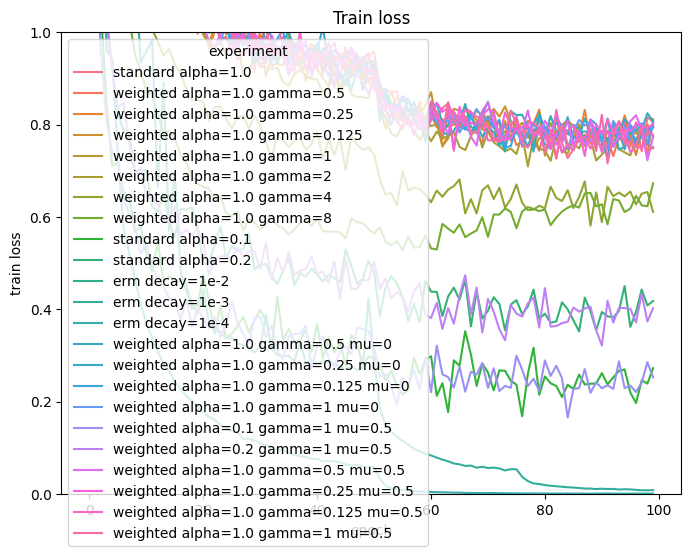

In [6]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Train loss")
plt.show()

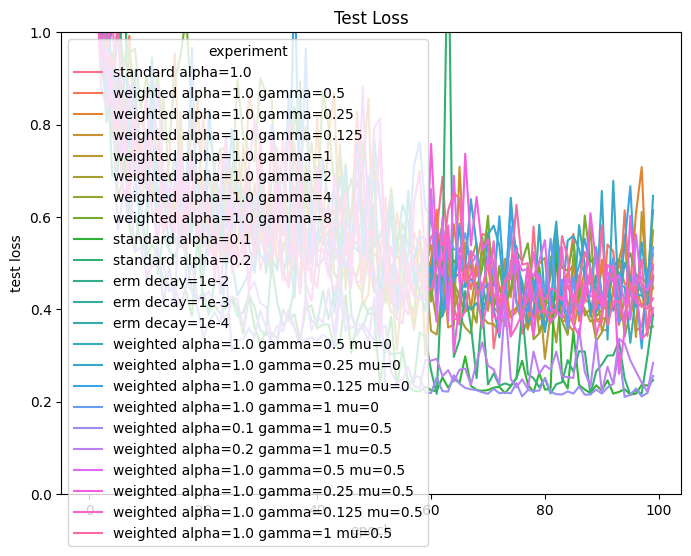

In [7]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Test Loss")
plt.show()

In [8]:
import torch
import numpy as np
import pandas as pd


cifar10_name_power_filename = [
    (
        "gamma=0.063",
        -4.0,
        "results/cm_mu05_ResNet18_weighted_0.063_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=0.088",
        -3.5,
        "results/cm_mu05_ResNet18_weighted_0.088_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=0.125",
        -3.0,
        "results/cm_mu05_ResNet18_weighted_0.125.pt",
    ),
    (
        "gamma=0.177",
        -2.5,
        "results/cm_mu05_ResNet18_weighted_0.177_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=0.250",
        -2.0,
        "results/cm_mu05_ResNet18_weighted_0.25.pt",
    ),
    (
        "gamma=0.354",
        -1.5,
        "results/cm_mu05_ResNet18_weighted_0.354_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=0.500",
        -1.0,
        "results/cm_mu05_ResNet18_weighted_0.5.pt",
    ),
    (
        "gamma=0.707",
        -0.5,
        "results/cm_mu05_ResNet18_weighted_0.707_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=1.000",
        0.0,
        "results/cm_mu05_ResNet18_weighted_1.pt",
    ),
    (
        "gamma=1.414",
        0.5,
        "results/cm_mu05_ResNet18_weighted_1.414_gammagrowth=1.0_step=100.pt",
    ),
    (
        "gamma=2.000",
        1.0,
        "results/cm_mu05_ResNet18_weighted_2_gammagrowth=1.0_step=100.pt",
    ),
]

power_gammainfilename = [
    (-4.0, 0.063),
    (-3.5, 0.088),
    (-3.0, 0.125),
    (-2.5, 0.177),
    (-2.0, 0.250),
    (-1.0, 0.500),
    (0.0, 1.000),
    (0.5, 1.414),
    (1.0, 2.000),
]

cifar100_name_power_filename = [
    (
        f"gamma={gamma}",
        power,
        f"cifar100results/cm_mu05_ResNet18_weighted_{gamma}_gammagrowth=1.0_step=100.pt",
    )
    for power, gamma in power_gammainfilename
]

In [9]:
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix

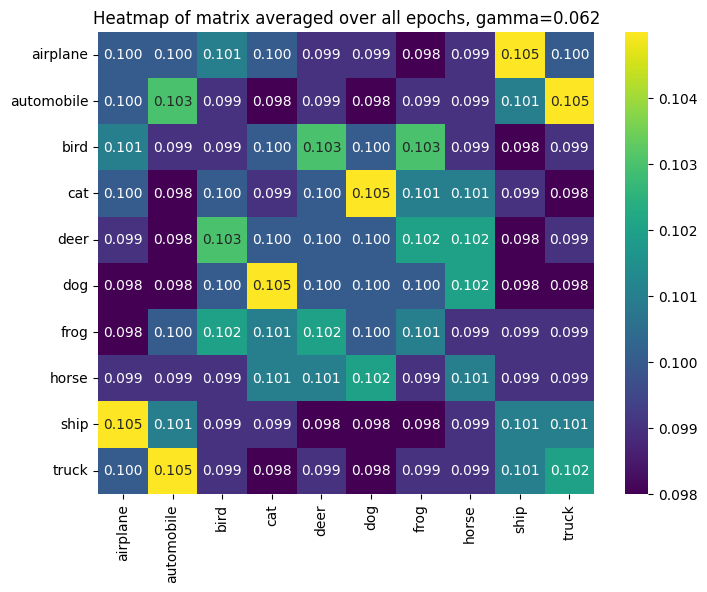

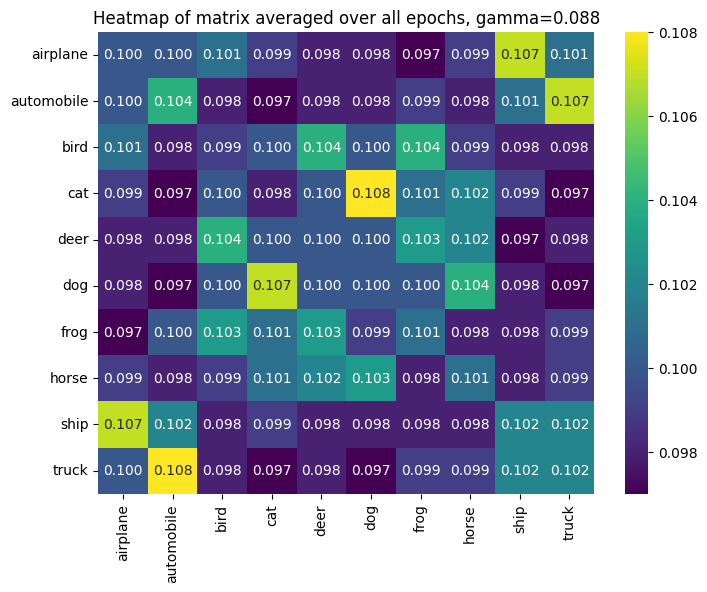

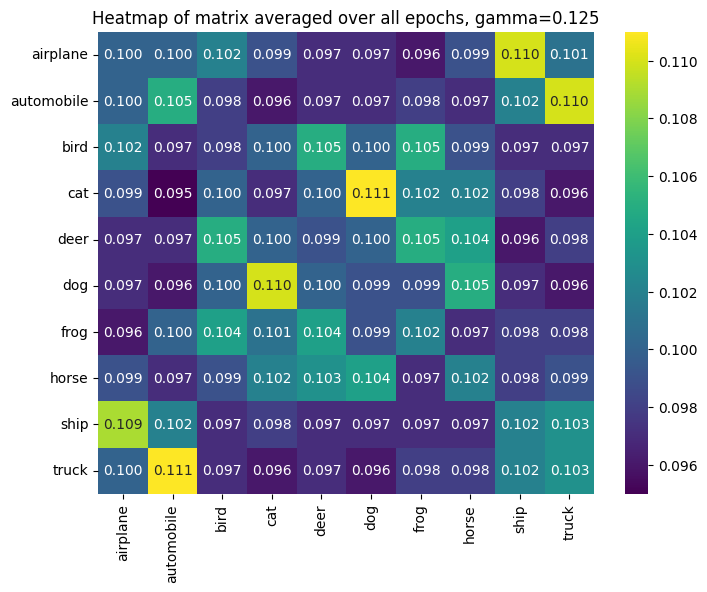

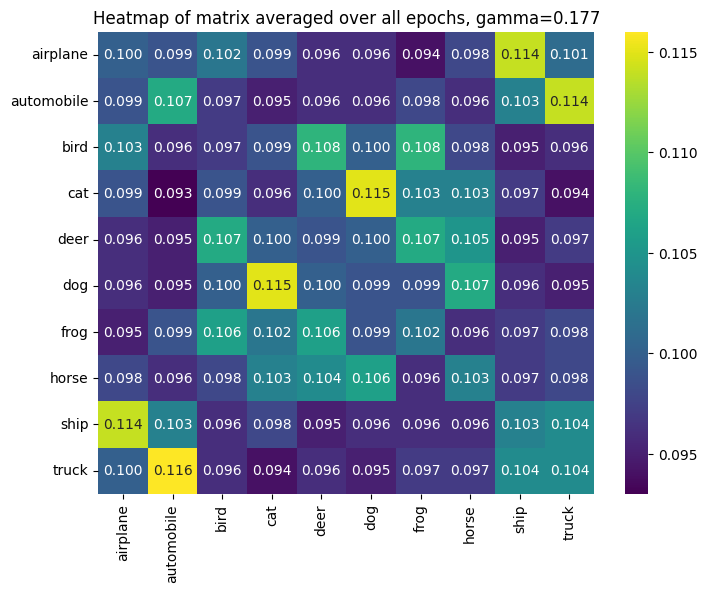

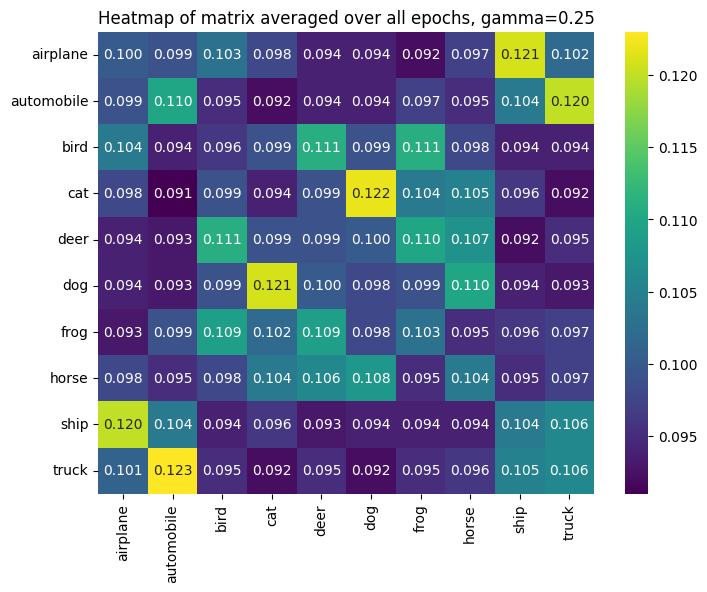

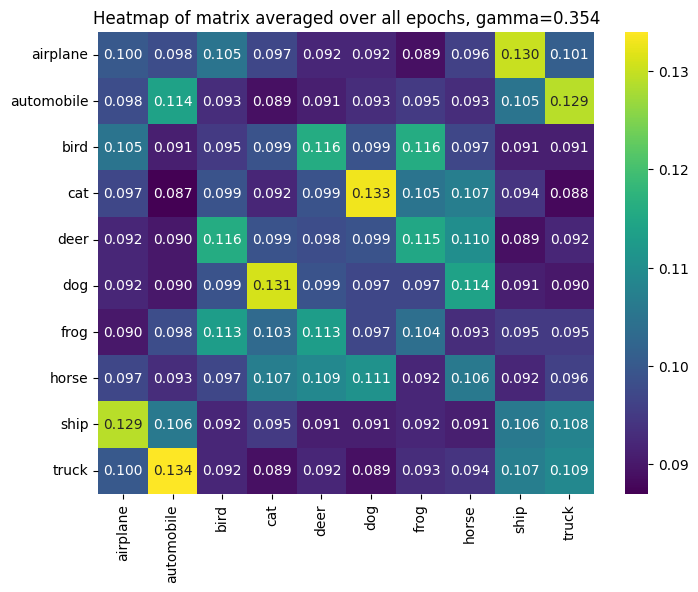

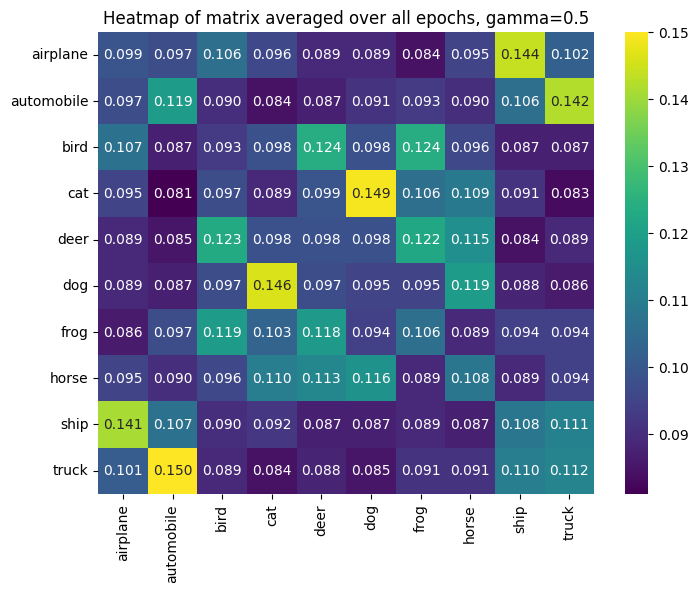

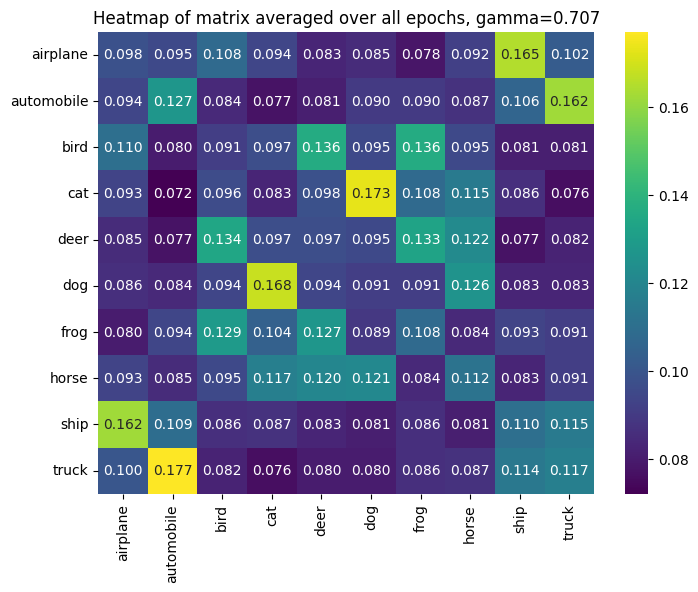

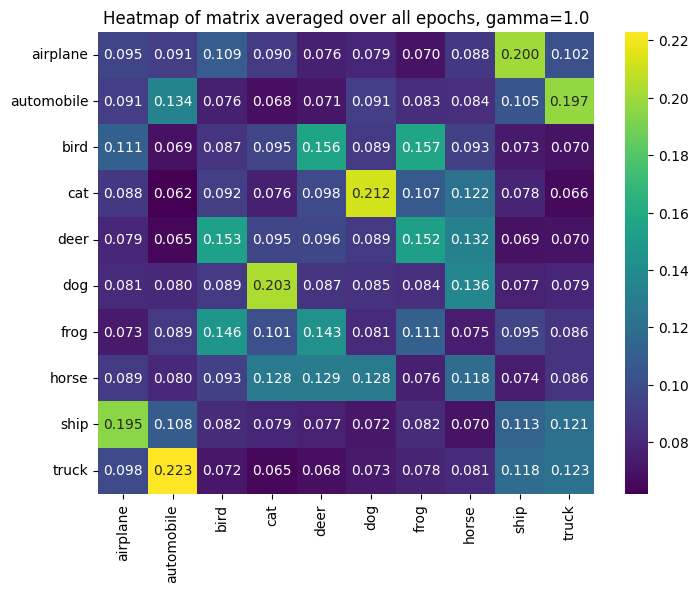

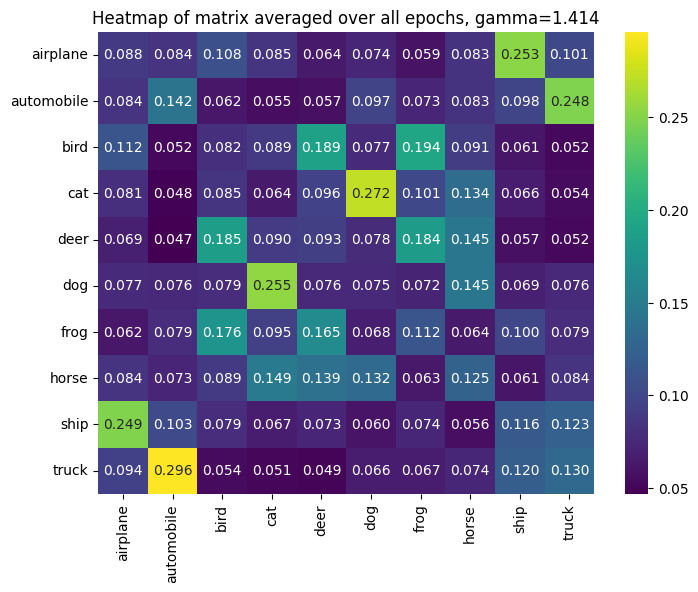

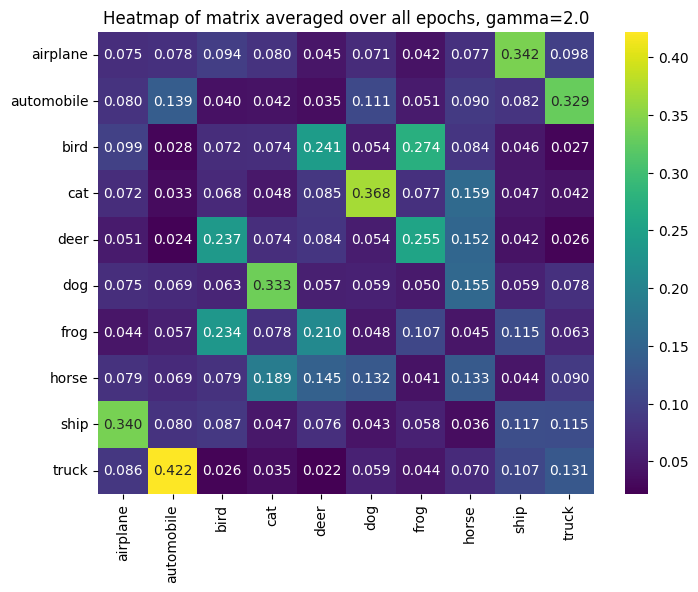

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]


for name, power, filename in cifar10_name_power_filename:
    cms = torch.load(filename).numpy()

    gamma = 2**power
    cms = cms**gamma
    cms = make_doubly_stochastic(cms)

    cm_post_avg = np.round(np.mean(cms, axis=2), 3)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm_post_avg,
        cmap="viridis",
        fmt=".3f",
        annot=cm_post_avg,
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.title(f"Heatmap of matrix averaged over all epochs, gamma={np.round(gamma, 3)}")
    plt.show()

Average delta for cifar10 gamma=0.063: 		0.026582760736346245
Average std of cms for cifar10 gamma=0.063: 	0.001834266702644527
Average delta for cifar10 gamma=0.088: 		0.026015648618340492
Average std of cms for cifar10 gamma=0.088: 	0.0025923005305230618
Average delta for cifar10 gamma=0.125: 		0.025694213807582855
Average std of cms for cifar10 gamma=0.125: 	0.0037249932065606117
Average delta for cifar10 gamma=0.177: 		0.024689458310604095
Average std of cms for cifar10 gamma=0.177: 	0.005274304188787937
Average delta for cifar10 gamma=0.250: 		0.023544982075691223
Average std of cms for cifar10 gamma=0.250: 	0.0075543783605098724
Average delta for cifar10 gamma=0.354: 		0.022155631333589554
Average std of cms for cifar10 gamma=0.354: 	0.01098602544516325
Average delta for cifar10 gamma=0.500: 		0.020127056166529655
Average std of cms for cifar10 gamma=0.500: 	0.015863435342907906
Average delta for cifar10 gamma=0.707: 		0.017999175935983658
Average std of cms for cifar10 gamma=0.7

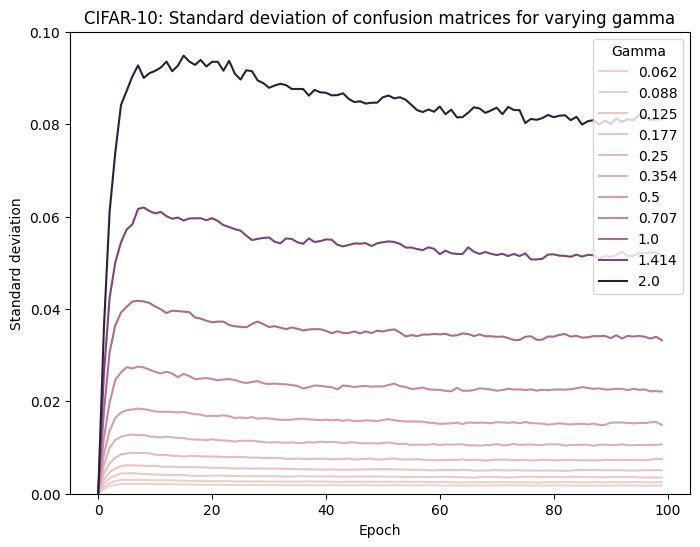

Average delta for cifar100 gamma=0.063: 		0.005485451780259609
Average std of cms for cifar100 gamma=0.063: 	0.000368465727660805
Average delta for cifar100 gamma=0.088: 		0.005385807249695063
Average std of cms for cifar100 gamma=0.088: 	0.000529365730471909
Average delta for cifar100 gamma=0.125: 		0.005255850497633219
Average std of cms for cifar100 gamma=0.125: 	0.0007685440359637141
Average delta for cifar100 gamma=0.177: 		0.005061928182840347
Average std of cms for cifar100 gamma=0.177: 	0.001128008938394487
Average delta for cifar100 gamma=0.25: 		0.004772614222019911
Average std of cms for cifar100 gamma=0.25: 	0.0016857186565175653
Average delta for cifar100 gamma=0.5: 		0.0036109648644924164
Average std of cms for cifar100 gamma=0.5: 	0.004139667376875877
Average delta for cifar100 gamma=1.0: 		0.0012468511704355478
Average std of cms for cifar100 gamma=1.0: 	0.013118891045451164
Average delta for cifar100 gamma=1.414: 		0.003784371539950371
Average std of cms for cifar100 g

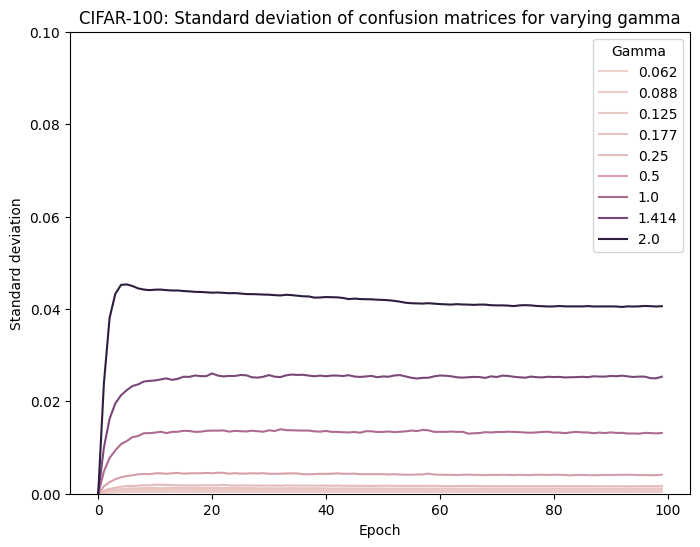

In [22]:
cifar10_name_power_filename_ = [
    ("cifar10", name, power, filename)
    for name, power, filename in cifar10_name_power_filename
]
cifar100_name_power_filename_ = [
    ("cifar100", name, power, filename)
    for name, power, filename in cifar100_name_power_filename
]

l = []
for experiment, name, power, filename in cifar100_name_power_filename_:
    if (
        filename
        == "cifar100results/cm_mu05_ResNet18_weighted_1.0_gammagrowth=1.0_step=100.pt"
    ):
        filename = (
            "cifar100results/cm_mu05_ResNet18_weighted_1_gammagrowth=1.0_step=100.pt"
        )
    if (
        filename
        == "cifar100results/cm_mu05_ResNet18_weighted_2.0_gammagrowth=1.0_step=100.pt"
    ):
        filename = (
            "cifar100results/cm_mu05_ResNet18_weighted_2_gammagrowth=1.0_step=100.pt"
        )
    if (
        filename
        == "cifar100results/cm_mu05_ResNet18_weighted_4.0_gammagrowth=1.0_step=100.pt"
    ):
        filename = (
            "cifar100results/cm_mu05_ResNet18_weighted_1_gammagrowth=1.0_step=100.pt"
        )
    l.append((experiment, name, power, filename))
cifar100_name_power_filename_ = l


for data in [cifar10_name_power_filename_, cifar100_name_power_filename_]:
    dataset = "CIFAR-10" if data[0][0] == "cifar10" else "CIFAR-100"

    df_cms = []
    for experiment, name, power, filename in data:
        cms = torch.load(filename).numpy()
        cms_pre = cms.copy()

        gamma = 2**power
        cms = cms**gamma

        cms = make_doubly_stochastic(cms)

        print(
            f"Average delta for {experiment} {name}: \t\t{np.mean(np.abs(cms - cms_pre))}"
        )
        print(f"Average std of cms for {experiment} {name}: \t{np.std(cms)}")

        for epoch in range(cms.shape[2]):
            cm = cms[:, :, epoch]
            cm_std = np.std(cm)
            df_cms.append(
                {
                    "experiment": experiment,
                    "name": name,
                    "gamma": gamma,
                    "epoch": epoch,
                    "cms_std": cm_std,
                }
            )
    df_cms = pd.DataFrame(df_cms)
    df_cms["gamma"] = df_cms["gamma"].apply(lambda x: np.round(x, 3))

    # plot the standard deviation of the confusion matrices
    plt.figure(figsize=(8, 6))
    sns.lineplot(
        data=df_cms,
        x="epoch",
        y="cms_std",
        hue="gamma",
        legend="full",
    )
    plt.title(f"{dataset}: Standard deviation of confusion matrices for varying gamma")
    plt.xlabel("Epoch")
    plt.ylabel("Standard deviation")
    plt.ylim(0, 0.1)
    plt.legend(loc="upper right", title="Gamma")
    plt.show()

In [12]:
cifar10_standard_filenames = [
    "results/log_0_ResNet18_standard_1.0.csv",
    "results/log_1_ResNet18_standard_0.125_gammagrowth=1.0_step=100.csv",
]

cifar10_standard_dfs = [
    pd.read_csv(filename) for filename in cifar10_standard_filenames
]
for i, df in enumerate(cifar10_standard_dfs):
    df["test acc"] = df["test acc"] / 100
    df["experiment"] = i
medians = [
    df.groupby("experiment")["test acc"].apply(lambda x: x.tail(20)).median()
    for df in cifar10_standard_dfs
]
print("Median test accuracy for standard models on CIFAR-10:")
1 - np.mean(medians)

Median test accuracy for standard models on CIFAR-10:


0.06467498779296865

In [13]:
cifar100_standard_filenames = [
    "cifar100results/log_0_ResNet18_standard_1.0.csv",
    "cifar100results/log_1_ResNet18_standard_1.0.csv",
]

cifar100_standard_dfs = [
    pd.read_csv(filename) for filename in cifar100_standard_filenames
]

for i, df in enumerate(cifar100_standard_dfs):
    df["test acc"] = df["test acc"] / 100
    df["experiment"] = i
medians = [
    df.groupby("experiment")["test acc"].apply(lambda x: x.tail(20)).median()
    for df in cifar100_standard_dfs
]
print("Median test accuracy for standard models on CIFAR-100:")
1 - np.mean(medians)

Median test accuracy for standard models on CIFAR-100:


0.2760499954223633

In [14]:
import os
import re


cifar10_filenames = [
    filename
    for filename in os.listdir("results")
    if re.match(r"log_mu05.*\.csv", filename) and "alpha" not in filename
]
cifar100_filenames = [
    filename
    for filename in os.listdir("cifar100results")
    if re.match(r"log_mu05.*\.csv", filename)
]
cifar10_dfs = [
    pd.read_csv(os.path.join("results", filename)) for filename in cifar10_filenames
]
cifar100_dfs = [
    pd.read_csv(os.path.join("cifar100results", filename))
    for filename in cifar100_filenames
]
for cifar10_df, filename in zip(cifar10_dfs, cifar10_filenames):
    cifar10_df["dataset"] = "cifar10"
    filename = filename[:-4]
    cifar10_df["experiment"] = float(filename.split("_")[4])


for cifar100_df, filename in zip(cifar100_dfs, cifar100_filenames):
    cifar100_df["dataset"] = "cifar100"
    filename = filename[:-4]
    cifar100_df["experiment"] = float(filename.split("_")[4])


log_df = pd.concat(cifar10_dfs + cifar100_dfs)
log_df["test error"] = 1 - log_df["test acc"] / 100
medians_last_20 = (
    log_df.groupby(["dataset", "experiment"])["test error"]
    .apply(lambda x: x.tail(20).median())
    .reset_index()
)
medians_last_20

,dataset,experiment,test error
0,cifar10,0.063,0.06445
1,cifar10,0.088,0.06485
2,cifar10,0.125,0.06215
3,cifar10,0.177,0.06035
4,cifar10,0.250,0.05915
5,cifar10,0.354,0.06345
6,cifar10,0.500,0.06325
7,cifar10,0.707,0.06435
8,cifar10,1.000,0.06150
9,cifar10,1.414,0.06720


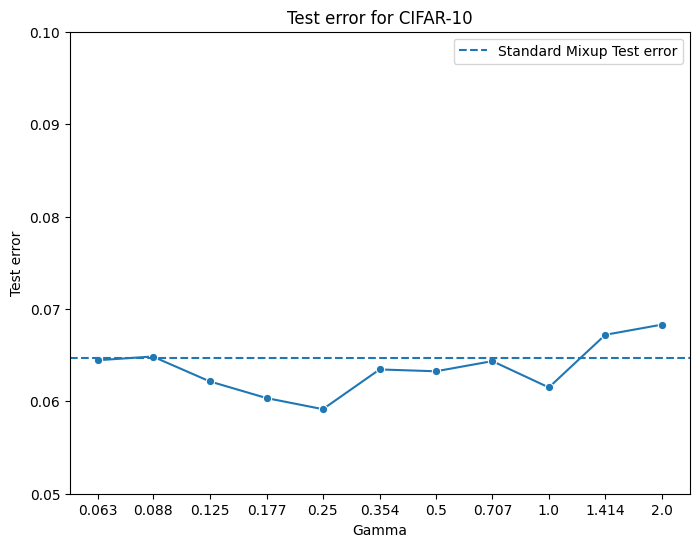

In [15]:
gamma_values = [0.063, 0.088, 0.125, 0.177, 0.25, 0.354, 0.5, 0.707, 1.0, 1.414, 2.0]
cifar_10_index = medians_last_20["dataset"] == "cifar10"

plt.figure(figsize=(8, 6))


sns.lineplot(
    data=medians_last_20[cifar_10_index],
    x="experiment",
    y="test error",
    marker="o",
)
median_standard = 0.06467498779296865

plt.axhline(
    y=median_standard,
    label="Standard Mixup Test error",
    linestyle="--",
)

plt.xscale("log", base=2)
plt.xticks(gamma_values, labels=[str(gamma) for gamma in gamma_values])
plt.xlabel("Gamma")
plt.ylabel("Test error")
plt.ylim(0.05, 0.10)
plt.title("Test error for CIFAR-10")
plt.legend()
plt.show()

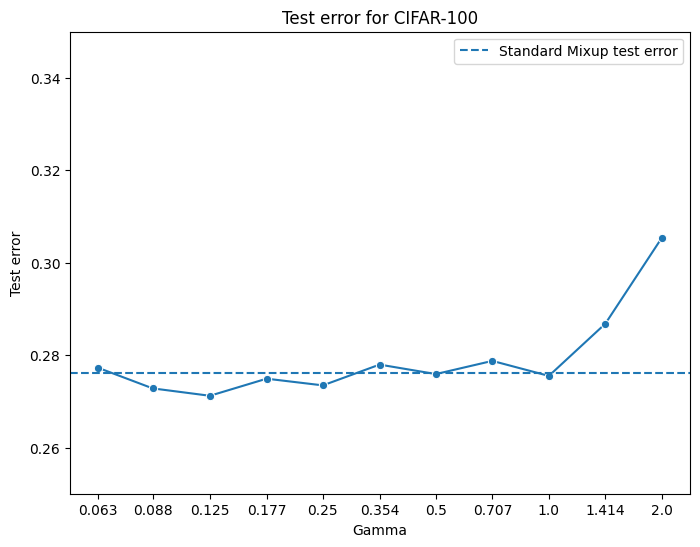

In [16]:
gamma_values = [0.063, 0.088, 0.125, 0.177, 0.25, 0.354, 0.5, 0.707, 1.0, 1.414, 2.0]

cifar_100_index = medians_last_20["dataset"] == "cifar100"

median_standard = 0.2760499954223633

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=medians_last_20[cifar_100_index],
    x="experiment",
    y="test error",
    marker="o",
)
plt.axhline(
    y=median_standard,
    label="Standard Mixup test error",
    linestyle="--",
)
plt.xscale("log", base=2)
plt.ylim(0.25, 0.35)
plt.xticks(gamma_values, labels=[str(gamma) for gamma in gamma_values])
plt.title("Test error for CIFAR-100")
plt.ylabel("Test error")
plt.xlabel("Gamma")
plt.legend()
plt.show()

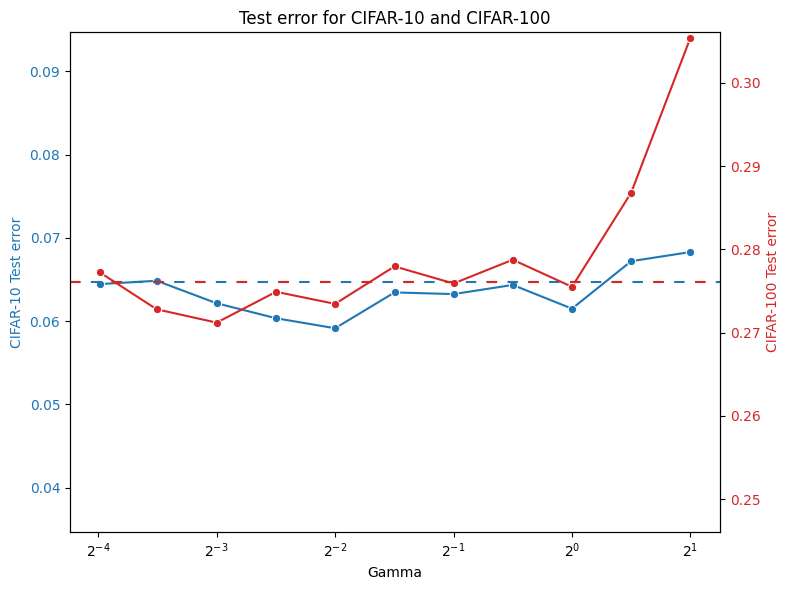

In [17]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_process_data(filenames, path, dataset_name):
    dfs = []
    for filename in filenames:
        df = pd.read_csv(os.path.join(path, filename))
        df["dataset"] = dataset_name
        experiment_value = float(filename[:-4].split("_")[4])
        df["experiment"] = experiment_value
        dfs.append(df)
    return dfs


# Load CIFAR-10 data
cifar10_filenames = [
    filename
    for filename in os.listdir("results")
    if re.match(r"log_mu05.*\.csv", filename) and "alpha" not in filename
]
cifar10_dfs = load_and_process_data(cifar10_filenames, "results", "cifar10")

# Load CIFAR-100 data
cifar100_filenames = [
    filename
    for filename in os.listdir("cifar100results")
    if re.match(r"log_mu05.*\.csv", filename)
]
cifar100_dfs = load_and_process_data(cifar100_filenames, "cifar100results", "cifar100")

# Combine data and calculate test error
log_df = pd.concat(cifar10_dfs + cifar100_dfs)
log_df["test error"] = 1 - log_df["test acc"] / 100

# Calculate median of the last 20 test errors
medians_last_20 = (
    log_df.groupby(["dataset", "experiment"])["test error"]
    .apply(lambda x: x.tail(20).median())
    .reset_index()
)

# Constants for plotting
gamma_values = [0.063, 0.088, 0.125, 0.177, 0.25, 0.354, 0.5, 0.707, 1.0, 1.414, 2.0]
median_standard_10 = 0.06467498779296865
median_standard_100 = 0.2760499954223633
margin = 0.03

# Filtering indices
cifar_10_index = medians_last_20["dataset"] == "cifar10"
cifar_100_index = medians_last_20["dataset"] == "cifar100"

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot CIFAR-10 data
dash_length = 5

color = "tab:blue"
ax1.set_xlabel("Gamma")
ax1.set_ylabel("CIFAR-10 Test error", color=color)
sns.lineplot(
    data=medians_last_20[cifar_10_index],
    x="experiment",
    y="test error",
    marker="o",
    ax=ax1,
    color=color,
)
ax1.axhline(
    y=median_standard_10,
    label="CIFAR-10 Standard Mixup Test error",
    linestyle="--",
    color=color,
    dashes=(dash_length, dash_length),
)
ax1.set_xscale("log", base=2)
ax1.set_xticks(gamma_values)
ax1.set_xticklabels([str(gamma) for gamma in gamma_values])
ax1.set_ylim(median_standard_10 - margin, median_standard_10 + margin)
ax1.tick_params(axis="y", labelcolor=color)
ax1.legend(loc="upper left")
plt.legend().remove()


# Plot CIFAR-100 data
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("CIFAR-100 Test error", color=color)
sns.lineplot(
    data=medians_last_20[cifar_100_index],
    x="experiment",
    y="test error",
    marker="o",
    ax=ax2,
    color=color,
)
ax2.axhline(
    y=median_standard_100,
    label="CIFAR-100 Standard Mixup Test error",
    linestyle="--",
    color=color,
    dashes=(dash_length, 3 * dash_length),
)
ax2.set_xscale("log", base=2)
ax2.set_ylim(median_standard_100 - margin, median_standard_100 + margin)
ax2.tick_params(axis="y", labelcolor=color)
ax2.legend(loc="upper right")

plt.title("Test error for CIFAR-10 and CIFAR-100")
fig.tight_layout()
plt.legend().remove()
plt.show()

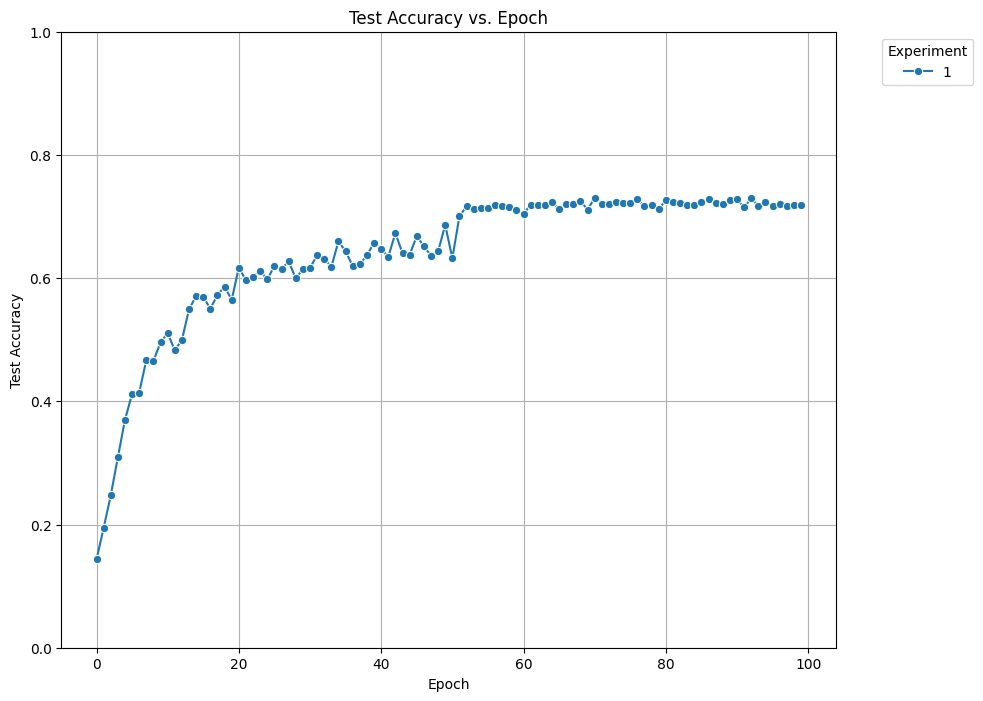

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.lineplot(
    data=df,
    x="epoch",
    y="test acc",
    hue="experiment",
    style="experiment",
    markers=True,
    dashes=False,
)
plt.title("Test Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
plt.legend(title="Experiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns


# Define the function for making matrices doubly stochastic
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix


# Load the confusion matrices for both Standard Alpha and ERM experiments
cms_dict = {
    "standard alpha=1.0": torch.load("results/cm_0_ResNet18_standard_1.0.pt"),
    "standard alpha=0.1": torch.load("results/cm_alpha01_ResNet18_standard_1.0.pt"),
    "standard alpha=0.2": torch.load("results/cm_alpha02_ResNet18_standard_1.0.pt"),
    "erm decay=1e-2": torch.load("results/cm_decay1e-2_ResNet18_erm_1.0.pt"),
    "erm decay=1e-3": torch.load("results/cm_decay1e-3_ResNet18_erm_1.0.pt"),
    "erm decay=1e-4": torch.load("results/cm_decay1e-4_ResNet18_erm_1.0.pt"),
}

# Process each confusion matrix
cms_df = []
for key, value in cms_dict.items():
    cur_df = pd.DataFrame()
    cms = value.permute(2, 0, 1).numpy()

    # Calculate std deviation before any processing
    std_pre = np.std(cms.reshape(100, -1), axis=1)
    cur_df["std_pre"] = std_pre

    # No special processing based on alpha or decay rates prior to making doubly stochastic
    for i in range(100):
        cms[i] = make_doubly_stochastic(cms[i])
    std_post = np.std(cms.reshape(100, -1), axis=1)
    cur_df["std_post"] = std_post

    # Add experiment info
    cur_df["experiment"] = key
    cur_df["epoch"] = np.arange(100)

    cms_df.append(cur_df)

# Merge with main DataFrame
cms_df = pd.concat(cms_df)
df_merged = df.merge(cms_df, on=["experiment", "epoch"], how="right")

ValueError: You are trying to merge on int64 and object columns for key 'experiment'. If you wish to proceed you should use pd.concat

In [ ]:
# Extract median values of the last 10 epochs and format the DataFrame
alpha_erm_df = df_merged.groupby("experiment").tail(10)
alpha_erm_df = alpha_erm_df.groupby("experiment").median()
alpha_erm_df = alpha_erm_df.reset_index()

# Extract the alpha or decay values for labeling purposes
import re


def extract_alpha_erm(experiment_name):
    # This function extracts alpha or decay values from the experiment names
    alpha_match = re.search(r"alpha=(\d+\.\d+|\d+)", experiment_name)
    decay_match = re.search(r"decay=(\d+e-\d+)", experiment_name)
    if alpha_match:
        return alpha_match.group(1)
    elif decay_match:
        return decay_match.group(1)
    return "N/A"  # In case no matching pattern is found


alpha_erm_df["parameter"] = alpha_erm_df["experiment"].apply(extract_alpha_erm)

# Selecting relevant columns to display
columns_to_display = [
    "experiment",
    "epoch",
    "train acc",
    "test loss",
    "test acc",
    "std_pre",
    "std_post",
    "parameter",
]
alpha_erm_df = alpha_erm_df[columns_to_display]

# Printing the DataFrame in a clean table format
print(alpha_erm_df)

# # save this DataFrame to a CSV file
# alpha_erm_df.to_csv('alpha_erm_analysis.csv', index=False)

           experiment  epoch  train acc  test loss  test acc   std_pre  \
0      erm decay=1e-2   94.5   0.100000   2.325844   0.10000  0.000012   
1      erm decay=1e-3   94.5   0.997770   3.651614   0.47835  0.167427   
2      erm decay=1e-4   94.5   0.999780   4.089431   0.48740  0.169344   
3  standard alpha=0.1   94.5   0.938950   0.225717   0.93635  0.024235   
4  standard alpha=0.2   94.5   0.895796   0.289449   0.93960  0.026062   
5  standard alpha=1.0   94.5   0.738103   0.449412   0.93470  0.038912   

   std_post parameter  
0  0.000012      1e-2  
1  0.157648      1e-3  
2  0.164098      1e-4  
3  0.020926       0.1  
4  0.022139       0.2  
5  0.033019       1.0  


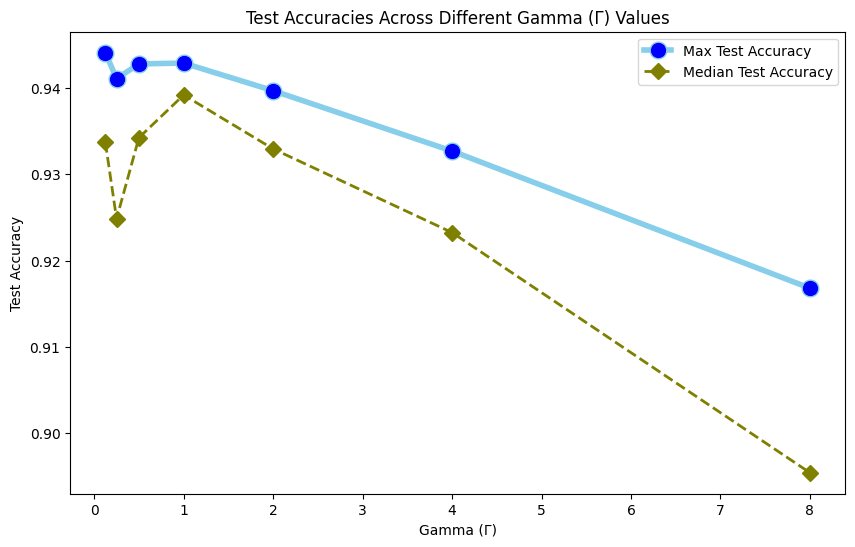

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Gamma Experiments
gamma_data = {
    "Gamma": [0.125, 0.25, 0.5, 1, 2, 4, 8],
    "Max Test Accuracy": [0.9441, 0.9411, 0.9428, 0.9429, 0.9397, 0.9327, 0.9168],
    "Median Test Accuracy": [
        0.93370,
        0.92485,
        0.93425,
        0.93920,
        0.93295,
        0.92325,
        0.89540,
    ],
}

gamma_df = pd.DataFrame(gamma_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    "Gamma",
    "Max Test Accuracy",
    data=gamma_df,
    marker="o",
    markerfacecolor="blue",
    markersize=12,
    color="skyblue",
    linewidth=4,
    label="Max Test Accuracy",
)
plt.plot(
    "Gamma",
    "Median Test Accuracy",
    data=gamma_df,
    marker="D",
    markersize=8,
    color="olive",
    linewidth=2,
    linestyle="dashed",
    label="Median Test Accuracy",
)
plt.legend()
plt.title("Test Accuracies Across Different Gamma (Γ) Values")
plt.xlabel("Gamma (Γ)")
plt.ylabel("Test Accuracy")
# plt.grid(True)
plt.show()

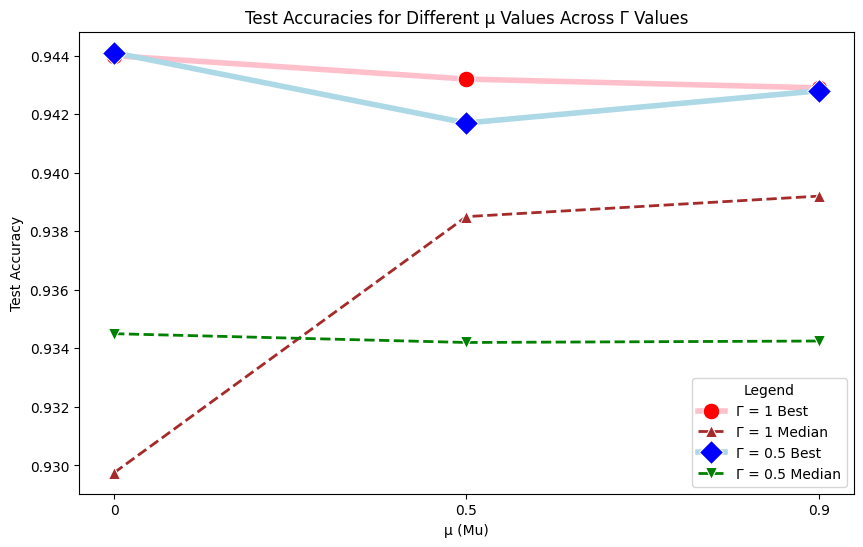

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for Mu experiments at different Gamma values
mu_data = {
    "Mu": ["0", "0.5", "0.9", "0", "0.5", "0.9"],
    "Gamma": ["1", "1", "1", "0.5", "0.5", "0.5"],
    "Best Test Accuracy": [0.9440, 0.9432, 0.9429, 0.9441, 0.9417, 0.9428],
    "Median Test Accuracy": [0.92975, 0.93850, 0.93920, 0.93450, 0.93420, 0.93425],
}
mu_df = pd.DataFrame(mu_data)

plt.figure(figsize=(10, 6))
# Plotting for Gamma = 1
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "1"],
    x="Mu",
    y="Best Test Accuracy",
    marker="o",
    markerfacecolor="red",
    markersize=12,
    color="pink",
    linewidth=4,
    label="Γ = 1 Best",
)
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "1"],
    x="Mu",
    y="Median Test Accuracy",
    marker="^",
    markersize=8,
    color="brown",
    linestyle="dashed",
    linewidth=2,
    label="Γ = 1 Median",
)

# Plotting for Gamma = 0.5
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "0.5"],
    x="Mu",
    y="Best Test Accuracy",
    marker="D",
    markerfacecolor="blue",
    markersize=12,
    color="lightblue",
    linewidth=4,
    label="Γ = 0.5 Best",
)
sns.lineplot(
    data=mu_df[mu_df["Gamma"] == "0.5"],
    x="Mu",
    y="Median Test Accuracy",
    marker="v",
    markersize=8,
    color="green",
    linestyle="dashed",
    linewidth=2,
    label="Γ = 0.5 Median",
)

plt.title("Test Accuracies for Different μ Values Across Γ Values")
plt.xlabel("μ (Mu)")
plt.ylabel("Test Accuracy")
plt.legend(title="Legend")
plt.show()

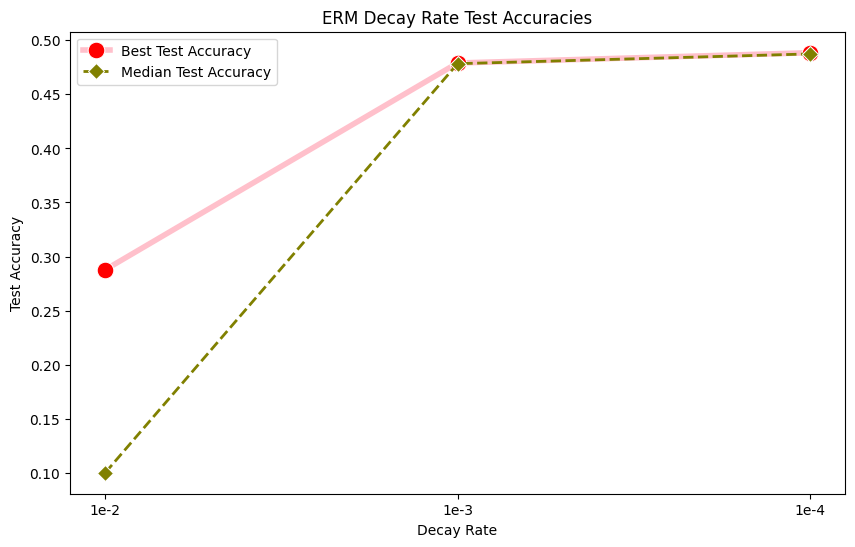

In [ ]:
# ERM Data
erm_data = {
    "Decay Rate": ["1e-2", "1e-3", "1e-4"],
    "Best Test Accuracy": [0.2878, 0.4790, 0.4885],
    "Median Test Accuracy": [0.10000, 0.47835, 0.48740],
}
erm_df = pd.DataFrame(erm_data)

plt.figure(figsize=(10, 6))
# sns.lineplot(data=erm_df, x='Decay Rate', y='Best Test Accuracy', marker='o', markerfacecolor='red' color='red', linewidth=2.5, markersize=12, label='Best Test Accuracy')
# sns.lineplot(data=erm_df, x='Decay Rate', y='Median Test Accuracy', marker='o', color='lightblue', linestyle='--', linewidth=2.5, markersize=12, label='Median Test Accuracy')

sns.lineplot(
    data=erm_df,
    x="Decay Rate",
    y="Best Test Accuracy",
    marker="o",
    markerfacecolor="red",
    markersize=12,
    color="pink",
    linewidth=4,
    label="Best Test Accuracy",
)
sns.lineplot(
    data=erm_df,
    x="Decay Rate",
    y="Median Test Accuracy",
    marker="D",
    markersize=8,
    color="olive",
    linewidth=2,
    linestyle="dashed",
    label="Median Test Accuracy",
)


plt.title("ERM Decay Rate Test Accuracies")
plt.xlabel("Decay Rate")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns


# Define the function for making matrices doubly stochastic
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix


# Load the confusion matrices for Mu experiments
cms_dict = {
    "weighted alpha=1.0 gamma=0.5 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_0.5.pt"
    ),
    "weighted alpha=1.0 gamma=0.25 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_0.25.pt"
    ),
    "weighted alpha=1.0 gamma=0.125 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_0.125.pt"
    ),
    "weighted alpha=1.0 gamma=1 mu=0": torch.load(
        "results/cm_mu0_ResNet18_weighted_1.pt"
    ),
    "weighted alpha=1.0 gamma=0.5 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_0.5.pt"
    ),
    "weighted alpha=1.0 gamma=0.25 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_0.25.pt"
    ),
    "weighted alpha=1.0 gamma=0.125 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_0.125.pt"
    ),
    "weighted alpha=1.0 gamma=1 mu=0.5": torch.load(
        "results/cm_mu05_ResNet18_weighted_1.pt"
    ),
}

# Process each confusion matrix
cms_df = []
for key, value in cms_dict.items():
    cur_df = pd.DataFrame()
    cms = value.permute(2, 0, 1).numpy()

    # Calculate std deviation before any processing
    std_pre = np.std(cms.reshape(100, -1), axis=1)
    cur_df["std_pre"] = std_pre

    # Apply doubly stochastic process
    mu = float(key.split("mu=")[-1].split()[0])
    post = cms**mu
    for i in range(100):
        post[i] = make_doubly_stochastic(post[i])
    std_post = np.std(post.reshape(100, -1), axis=1)
    cur_df["std_post"] = std_post

    # Add experiment info
    cur_df["experiment"] = key
    cur_df["epoch"] = np.arange(100)

    cms_df.append(cur_df)

# Merge with main DataFrame
cms_df = pd.concat(cms_df)
df_merged = df.merge(cms_df, on=["experiment", "epoch"], how="right")

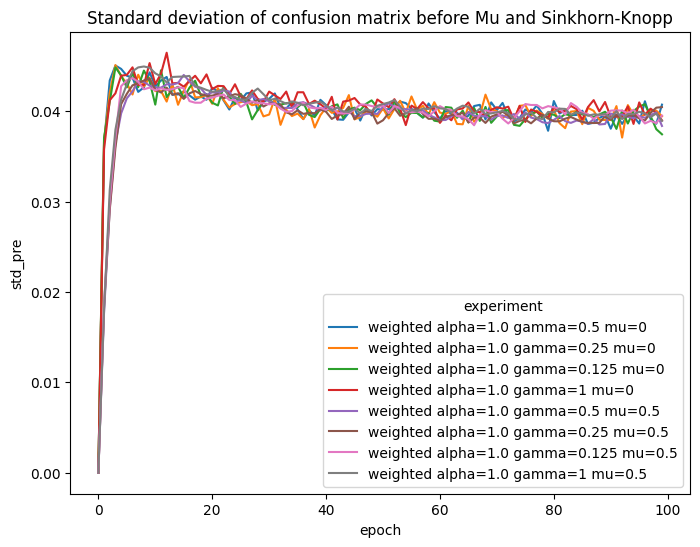

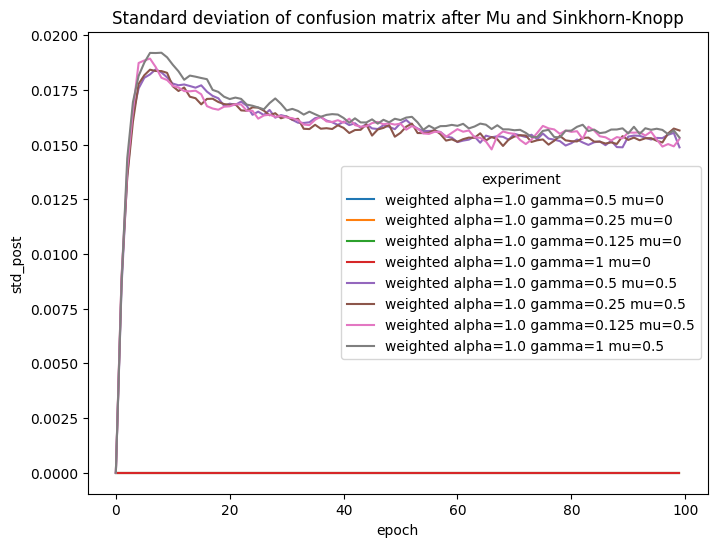

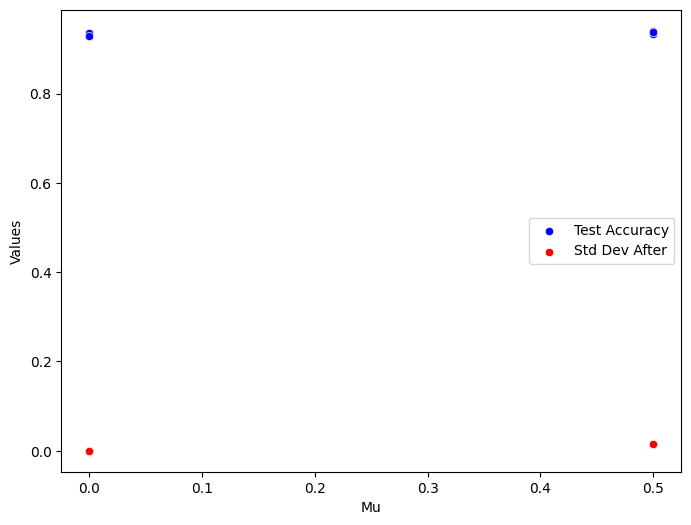

In [ ]:
# Plotting standard deviation before and after Sinkhorn-Knopp
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_pre", hue="experiment")
plt.title("Standard deviation of confusion matrix before Mu and Sinkhorn-Knopp")
plt.show()

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_merged, x="epoch", y="std_post", hue="experiment")
plt.title("Standard deviation of confusion matrix after Mu and Sinkhorn-Knopp")
plt.show()

# Analysis of accuracy and standard deviation post adjustment
mu_df = df_merged.groupby("experiment").tail(10)
mu_df = mu_df.groupby("experiment").median()
mu_df = mu_df.reset_index()
mu_df["mu"] = mu_df["experiment"].str.extract(r"mu=(\d+\.?\d*)").astype(float)

# plot accuracy and standard deviation as a function of Mu
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mu_df, x="mu", y="test acc", color="blue", label="Test Accuracy")
sns.scatterplot(data=mu_df, x="mu", y="std_post", color="red", label="Std Dev After")
plt.xlabel("Mu")
plt.ylabel("Values")
plt.legend()
plt.show()